In [11]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

### Reading in the Final PPR 

In [2]:
ppr_df = pd.read_csv('Data/final_ppr.csv')

In [3]:
# Converting dataframe to geodataframe
ppr_gdf = gpd.GeoDataFrame(ppr_df,
                       crs = {'init' :'epsg:4326'},
                       geometry=gpd.points_from_xy(ppr_df.longitude, ppr_df.latitude))
ppr_gdf.head(1).transpose()


C:\Users\Karina\miniconda3\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,0
date,2022-06-30
month_year,2022-06
total_address,"25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D..."
formatted_address,"25 FINGAL ST, SAINT CATHERINE'S, DUBLIN, D08 Y..."
input_string,"25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D..."
...,...
crime_total,2535.0
range_lea_listings,No Airbnbs Present
lea_no_of_listings,0.0
range_ed_no_of_listings,<5 Airbnb listings


### Creating Plan PPR

In [4]:
# to be used in QGIS
plain_ppr = ppr_gdf[['input_string', 'geometry','longitude', 'latitude']]
plain_ppr.shape

(22274, 4)

In [5]:
plain_ppr.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
# reseting index but using it as an 'ID'
plain_ppr = plain_ppr.reset_index()

# renaming index as 'ID'
plain_ppr = plain_ppr.rename(columns={'index': 'id'})

# giving each house a unique number 
plain_ppr['id'] = plain_ppr['id'] + 1000000

plain_ppr.head(5).transpose()

,0,1,2,3,4
id,1000000,1000001,1000002,1000003,1000004
input_string,"25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...","8 THIRLESTANE TERRACE, THOMAS COURT, DUBLIN 8,...","11 BOW BRIDGE, BOW BRIDGE HOUSE, KILMAINHAM, D...","26 STREET JAMES COURT, MOUNT BROWN, KILMAINHAM...","34 THE WAREHOUSE, CLANBRASSIL TERRACE, CLANBRA..."
geometry,POINT (-6.2882437 53.3353729),POINT (-6.2817912 53.3423154),POINT (-6.2977107 53.34240819999999),POINT (-6.2980956 53.3414585),POINT (-6.2747221 53.3356182)
longitude,-6.288244,-6.281791,-6.297711,-6.298096,-6.274722
latitude,53.335373,53.342315,53.342408,53.341459,53.335618


### Plotting Map

In [7]:
LEA_gdf = gpd.read_file('Data/Shapefiles/LEA.geojson')#
LEA_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

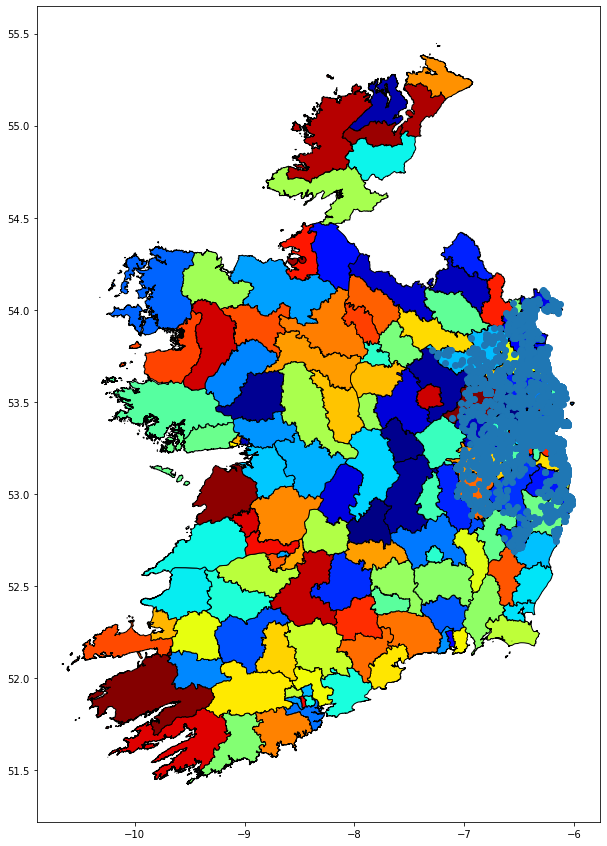

In [8]:
fig,ax = plt.subplots(figsize = (15,15))
LEA_gdf.plot(aspect = 1, ax = ax, cmap = 'jet', edgecolor = 'black')
plain_ppr.plot(ax = ax)

### Checking Railway

In [10]:
railway_gdf = gpd.read_file('Data/Shapefiles/railway_stations.geojson')#
railway_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### CRS

In [9]:
# plain_ppr = plain_ppr.set_crs(epsg=3857)
plain_ppr = plain_ppr.to_crs(epsg=4326)
plain_ppr.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# checking for missing data
print('Nan in each columns' , plain_ppr.isna().sum(), sep='\n')
# no missing data

### Saving Plain PPR 

In [ ]:
plain_ppr.to_file('Data/Plain PPR/plain_ppr.shp', index=False)

In [ ]:
plain_ppr.shape

In [ ]:
# plain_ppr.to_file('Data/Plain PPR/plain_ppr.geojson', index=False)

In [12]:
plain_ppr = gpd.read_file('Data/Plain PPR/plain_ppr.shp')
plain_ppr.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
plain_ppr.shape

(22276, 6)

In [14]:
plain_ppr[plain_ppr['id']== 1022470]


,id,input_stri,longitude,latitude,raster_ppr,geometry
